### Constant eigenvalues 

**Initial condition**

$$\psi(x,0) = \mathcal{G}^{\epsilon}[q_0, p_0, C_0, \zeta_0]$$

**Potential**
$$
V(x) = 
    \begin{bmatrix}
        \delta & 0.0 
        \\
        0.0 & - \delta 
    \end{bmatrix}
$$

**Solution**
$$\psi(x,t) = \mathcal{G}^{\epsilon}[q_t, p_t, C_t, \zeta_t]$$ 
where 
$$q_t = q_0 + t*p_0, p_t = p_0, C_t = , \zeta_t = $$


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
matplotlib.rc('font', size=20)
matplotlib.rc('font', family='serif')
matplotlib.rc('lines', linewidth=2.5,linestyle="-.")
matplotlib.rc('lines', markersize=10)
matplotlib.rc('figure.subplot', hspace=.4)

import gaussian

In [2]:
data = np.loadtxt("parameters.txt")
g_list = [gaussian.Gaussian(1, row[0], row[1], row[2] + 1j*row[3], 0.1) for row in data ]

1.0000000000000004
1.0000000000000002
0.9999999999999994
0.9999999999999981
0.9999999999999994
0.999999999999999
0.9999999999949696
0.9999999984170796
0.9999999125004009
0.9999984144279855
0.9999863141420674
0.9999290463278507


No handles with labels found to put in legend.


0.9997435628955422


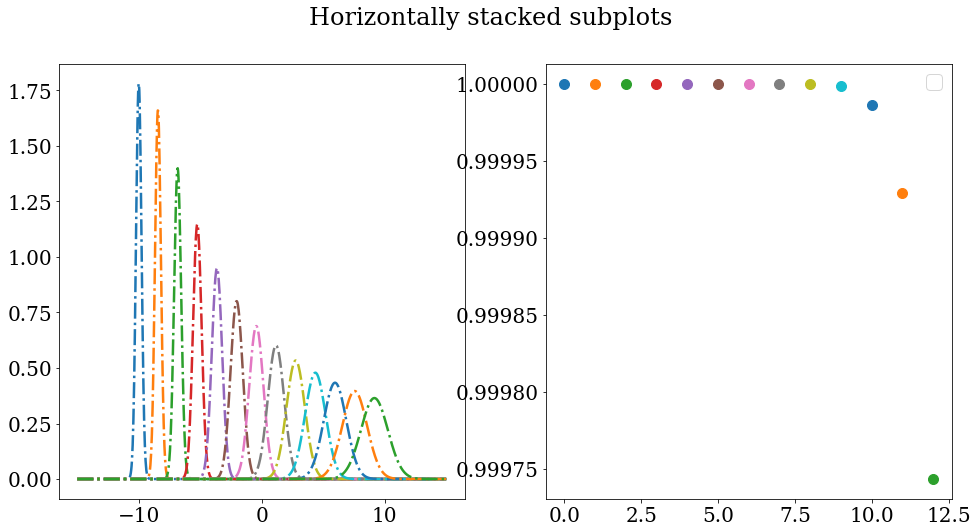

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')

x = np.linspace(-15,15,10**3)
y = np.zeros(len(x), dtype='complex128')
for i, G in enumerate(g_list):
    y += G.psi(x)
    ax1.plot(x, np.abs(G.psi(x))**2)
    ax2.scatter(i, G.l2norm())
    print(G.l2norm())
#true = gaussian.Gaussian(np.zeros(1),np.zeros(1),np.ones(1)*1j,1,1)
#print(true.l2norm(x))
#ax2.plot(x, true.real, label = 'original')
#ax2.plot(x, np.abs(y - true.psi(x)).real, label = 'abs error.re'
plt.legend()